In [ ]:
from google.colab import files
from zipfile import ZipFile

# Upload the zip file
uploaded = files.upload()

# Use the correct path
zip_path = "archive(1).zip"  # or list(uploaded.keys())[0] for dynamic name
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Extraction complete.")


Saving archive(1).zip to archive(1) (1).zip
Extraction complete.


In [ ]:
import pandas as pd
df = pd.read_csv("archive(1).zip")  # Adjust this path


In [ ]:
from zipfile import ZipFile

with ZipFile("archive(1).zip", 'r') as zip_ref:
    file_list = zip_ref.namelist()
    print("Files inside ZIP:")
    print(file_list)


Files inside ZIP:
['rows.csv']


In [ ]:
from google.colab import files
from zipfile import ZipFile

# Upload the zip file
uploaded = files.upload()

# Get the uploaded file's name
zip_path = list(uploaded.keys())[0]

# Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Extraction complete.")


Saving archive(1).zip to archive(1).zip
Extraction complete.


In [ ]:
import os

# List all files/folders in /content
for item in os.listdir("/content"):
    print(item)


.config
rows.csv
archive(1).zip
sample_data


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/rows.csv')

# Show the first few rows to verify
df.head()


,index,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,...,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4
0,0,2010,AL,Alabama,Tobacco Use – Survey Data,Cessation (Adults),Quit Attempt in Past Year Among Every Day Ciga...,BRFSS,NaN,%,...,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,167QUA,3GEN,8AGE,6RAC,6EDU
1,1,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,...,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,110CSA,3GEN,8AGE,6RAC,6EDU
2,2,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,...,18 to 44 Years,All Grades,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,110CSA,1GEN,5AGE,6RAC,6EDU
3,3,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,...,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU
4,4,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,...,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,110CSA,1GEN,8AGE,4RAC,6EDU


In [ ]:
import sqlite3

# Connect to a SQLite database (it creates the file if it doesn't exist)
conn = sqlite3.connect('/content/my_database.db')

# Convert the pandas DataFrame to SQL table named 'my_table'
df.to_sql('my_table', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()

print("CSV has been converted to SQL and saved as 'my_database.db'.")


CSV has been converted to SQL and saved as 'my_database.db'.


In [ ]:
# Reconnect to the database to fetch the data
conn = sqlite3.connect('/content/my_database.db')

# Query to check the first few rows of the table
query = "SELECT * FROM my_table LIMIT 5;"
result = pd.read_sql(query, conn)

# Show the result
print(result)

# Close the connection
conn.close()


   index  YEAR LocationAbbr LocationDesc                  TopicType  \
0      0  2010           AL      Alabama  Tobacco Use – Survey Data   
1      1  2010           AL      Alabama  Tobacco Use – Survey Data   
2      2  2010           AL      Alabama  Tobacco Use – Survey Data   
3      3  2010           AL      Alabama  Tobacco Use – Survey Data   
4      4  2010           AL      Alabama  Tobacco Use – Survey Data   

                TopicDesc                                        MeasureDesc  \
0      Cessation (Adults)  Quit Attempt in Past Year Among Every Day Ciga...   
1  Cigarette Use (Adults)                                    Current Smoking   
2  Cigarette Use (Adults)                                    Current Smoking   
3  Cigarette Use (Adults)                                    Current Smoking   
4  Cigarette Use (Adults)                                    Current Smoking   

  DataSource Response Data_Value_Unit  ...             Age   Education  \
0      BRFSS     N

In [ ]:
from google.colab import files

# Download the SQLite database
files.download('/content/my_database.db')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sqlite3

# Connect to the SQLite database (the one you downloaded)
conn = sqlite3.connect('my_database.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Run an SQL query (make sure to match the table name: 'my_table')
cursor.execute("SELECT * FROM my_table LIMIT 5;")  # or any query you want

# Fetch the results
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)

# Close the connection
conn.close()


(0, 2010, 'AL', 'Alabama', 'Tobacco Use – Survey Data', 'Cessation (Adults)', 'Quit Attempt in Past Year Among Every Day Cigarette Smokers', 'BRFSS', None, '%', 'Percentage', 53.3, None, None, 2.6, 48.2, 58.4, 659.0, 'Female', 'All Races', 'All Ages', 'All Grades', '(32.84057112200048, -86.63186076199969)', 'BEH', '100BEH', '167QUA', '3GEN', '8AGE', '6RAC', '6EDU')
(1, 2010, 'AL', 'Alabama', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking', 'BRFSS', None, '%', 'Percentage', 18.7, None, None, 0.8, 17.2, 20.2, 5234.0, 'Female', 'All Races', 'All Ages', 'All Grades', '(32.84057112200048, -86.63186076199969)', 'BEH', '100BEH', '110CSA', '3GEN', '8AGE', '6RAC', '6EDU')
(2, 2010, 'AL', 'Alabama', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking', 'BRFSS', None, '%', 'Percentage', 18.6, None, None, 1.4, 15.9, 21.3, 1197.0, 'Female', 'All Races', '18 to 44 Years', 'All Grades', '(32.84057112200048, -86.63186076199969)', 'BEH', '100BEH', '110CSA', 

In [ ]:
import sqlite3

# Connect to the SQLite database (use the correct path to your database)
conn = sqlite3.connect('/content/my_database.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Example 1: Run SQL query to fetch all rows from 'my_table'
cursor.execute("SELECT * FROM my_table;")
rows = cursor.fetchall()
for row in rows:
    print(row)


cursor.execute("SELECT * FROM my_table WHERE LocationAbbr = 'georgia';")
filtered_rows = cursor.fetchall()

for row in filtered_rows:
    print(row)

# Close the connection after queries

Streaming output truncated to the last 5000 lines.
(33050, 1997, 'GA', 'Georgia', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking – (2 yrs – Race/Ethnicity)', 'BRFSS', None, '%', 'Percentage', None, '*', 'Data in these cells have been suppressed because of a small sample size', None, None, None, None, 'Overall', 'Asian/Pacific Islander', 'All Ages', 'All Grades', '(32.83968109300048, -83.62758034599966)', 'BEH', '100BEH', '112CS2', '1GEN', '8AGE', '3RAC', '6EDU')
(33051, 1997, 'GA', 'Georgia', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking – (2 yrs – Race/Ethnicity)', 'BRFSS', None, '%', 'Percentage', 24.8, None, None, 4.6, 15.7, 33.9, 115.0, 'Overall', 'Hispanic', 'All Ages', 'All Grades', '(32.83968109300048, -83.62758034599966)', 'BEH', '100BEH', '112CS2', '1GEN', '8AGE', '4RAC', '6EDU')
(33052, 1997, 'HI', 'Hawaii', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking', 'BRFSS', None, '%', 'Percentage', 23.1, None,

In [ ]:
import sqlite3

# Connect to the SQLite database (the one you downloaded)
conn = sqlite3.connect('my_database.db')



# Print the results
cursor.execute("SELECT * FROM my_table WHERE LocationAbbr = 'GA';")
filtered_rows = cursor.fetchall()

for row in filtered_rows:
    print(row)


# Close the connection


(451, 2010, 'GA', 'Georgia', 'Tobacco Use – Survey Data', 'Cessation (Adults)', 'Percent of Former Smokers Among Ever Smokers', 'BRFSS', None, '%', 'Percentage', 56.7, None, None, 1.5, 53.7, 59.7, 2516.0, 'Overall', 'All Races', 'All Ages', 'All Grades', '(32.83968109300048, -83.62758034599966)', 'BEH', '101BEH', '169QUP', '1GEN', '8AGE', '6RAC', '6EDU')
(452, 2010, 'GA', 'Georgia', 'Tobacco Use – Survey Data', 'Cigarette Use (Adults)', 'Current Smoking', 'BRFSS', None, '%', 'Percentage', 33.6, None, None, 2.9, 27.9, 39.3, 680.0, 'Overall', 'All Races', 'Age 20 and Older', '< 12th Grade', '(32.83968109300048, -83.62758034599966)', 'BEH', '100BEH', '110CSA', '1GEN', '6AGE', '6RAC', '3EDU')
(453, 2010, 'GA', 'Georgia', 'Tobacco Use – Survey Data', 'Cessation (Adults)', 'Percent of Former Smokers Among Ever Smokers', 'BRFSS', None, '%', 'Percentage', 54.8, None, None, 1.9, 51.1, 58.5, 1391.0, 'Female', 'All Races', 'All Ages', 'All Grades', '(32.83968109300048, -83.62758034599966)', 'BEH'

In [ ]:
# Check the table schema (columns)
cursor.execute("PRAGMA table_info(my_table);")
columns = cursor.fetchall()
for column in columns:
    print(column)


(0, 'index', 'INTEGER', 0, None, 0)
(1, 'YEAR', 'INTEGER', 0, None, 0)
(2, 'LocationAbbr', 'TEXT', 0, None, 0)
(3, 'LocationDesc', 'TEXT', 0, None, 0)
(4, 'TopicType', 'TEXT', 0, None, 0)
(5, 'TopicDesc', 'TEXT', 0, None, 0)
(6, 'MeasureDesc', 'TEXT', 0, None, 0)
(7, 'DataSource', 'TEXT', 0, None, 0)
(8, 'Response', 'TEXT', 0, None, 0)
(9, 'Data_Value_Unit', 'TEXT', 0, None, 0)
(10, 'Data_Value_Type', 'TEXT', 0, None, 0)
(11, 'Data_Value', 'REAL', 0, None, 0)
(12, 'Data_Value_Footnote_Symbol', 'TEXT', 0, None, 0)
(13, 'Data_Value_Footnote', 'TEXT', 0, None, 0)
(14, 'Data_Value_Std_Err', 'REAL', 0, None, 0)
(15, 'Low_Confidence_Limit', 'REAL', 0, None, 0)
(16, 'High_Confidence_Limit', 'REAL', 0, None, 0)
(17, 'Sample_Size', 'REAL', 0, None, 0)
(18, 'Gender', 'TEXT', 0, None, 0)
(19, 'Race', 'TEXT', 0, None, 0)
(20, 'Age', 'TEXT', 0, None, 0)
(21, 'Education', 'TEXT', 0, None, 0)
(22, 'GeoLocation', 'TEXT', 0, None, 0)
(23, 'TopicTypeId', 'TEXT', 0, None, 0)
(24, 'TopicId', 'TEXT', 0, No

In [ ]:
#What are the unique years available in the dataset?
import sqlite3

# Connect to the SQLite database (the one you downloaded)
conn = sqlite3.connect('my_database.db')



# Print the results
cursor.execute("SELECT distinct YEAR from my_table;")
filtered_rows = cursor.fetchall()

for row in filtered_rows:
    print(row)


# Close the connection


(2010,)
(2009,)
(2008,)
(2007,)
(2006,)
(2005,)
(2004,)
(2003,)
(2002,)
(2001,)
(2000,)
(1999,)
(1998,)
(1997,)
(1996,)


In [ ]:
#How many records are there for each year?
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

# Query: count records for each year
cursor.execute("SELECT YEAR, COUNT(*) FROM my_table GROUP BY YEAR;")
filtered_rows = cursor.fetchall()

# Print the results
for row in filtered_rows:
    print(f"Year: {row[0]}, Count: {row[1]}")

# Close the connection



Year: 1996, Count: 2796
Year: 1997, Count: 2796
Year: 1998, Count: 2796
Year: 1999, Count: 2796
Year: 2000, Count: 2796
Year: 2001, Count: 2419
Year: 2002, Count: 2419
Year: 2003, Count: 2419
Year: 2004, Count: 2379
Year: 2005, Count: 2379
Year: 2006, Count: 2379
Year: 2007, Count: 2419
Year: 2008, Count: 2419
Year: 2009, Count: 2419
Year: 2010, Count: 2419


In [ ]:
#What are the different locations (states/regions) in the data?
import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("SELECT DISTINCT LocationAbbr FROM my_table;")
Locations=cursor.fetchall()

for location in Locations:
  print(location[0])



AL
AR
AK
AZ
CA
CO
CT
DE
GU
DC
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
US
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
PR
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
VI
WA
WV
WI
WY


In [ ]:
#What is the average Data_Value across all records?
import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("SELECT AVG(Data_Value) from my_table;")
Locations=cursor.fetchall()

print(f"Average Data_Value: {Locations}")


Average Data_Value: [(32.38791665512151,)]


In [ ]:
#What is the highest and lowest Data_Value recorded?
import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("SELECT max(Data_Value),min(Data_Value) from my_table;")
Locations=cursor.fetchall()

print(f"Highest Data_Value: {Locations[0][0]}")#[0]-tuple(98.6,12.3),[0][0]-highest,[0][1]-second element
print(f"Lowest Data_Value: {Locations[0][1]}")

Highest Data_Value: 95.2
Lowest Data_Value: 0.0


In [ ]:
#Which state (LocationDesc) has the highest average Data_Value?
import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("""
SELECT LocationDesc,avg(Data_Value) as avg_Val from my_table
group by LocationDesc
Order by avg_Val desc
limit 1;
""")
state=cursor.fetchone()

print(state[0])

Guam


In [ ]:
#What is the distribution of Data_Value for a specific TopicDesc
import sqlite3
conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("select Data_Value from my_table Order by TopicDesc;")
distribution=cursor.fetchall()

print(distribution)

[(53.3,), (53.5,), (50.8,), (50.5,), (52.2,), (51.9,), (57.0,), (55.6,), (56.2,), (55.4,), (53.4,), (51.8,), (64.0,), (62.5,), (53.5,), (46.2,), (65.9,), (65.0,), (50.7,), (51.3,), (51.8,), (41.4,), (49.4,), (59.0,), (64.7,), (65.6,), (67.0,), (50.5,), (51.5,), (53.0,), (60.1,), (60.7,), (61.3,), (51.7,), (51.8,), (51.9,), (65.9,), (68.9,), (72.1,), (53.0,), (53.4,), (53.9,), (58.3,), (60.7,), (63.4,), (49.6,), (55.4,), (61.8,), (62.1,), (57.8,), (59.9,), (61.5,), (60.8,), (60.1,), (63.5,), (64.5,), (52.3,), (52.8,), (53.3,), (62.4,), (56.7,), (54.8,), (58.2,), (50.2,), (53.9,), (58.6,), (65.3,), (57.7,), (61.0,), (33.4,), (42.6,), (39.2,), (48.7,), (51.9,), (54.7,), (61.1,), (65.4,), (63.6,), (58.1,), (59.4,), (60.4,), (52.3,), (56.7,), (61.5,), (60.9,), (51.8,), (58.3,), (52.9,), (54.6,), (56.2,), (56.4,), (53.4,), (50.9,), (55.6,), (54.2,), (52.6,), (59.2,), (50.2,), (45.5,), (41.4,), (61.7,), (56.1,), (50.7,), (54.5,), (47.0,), (61.1,), (58.8,), (55.9,), (46.9,), (51.2,), (52.4,), 

In [ ]:
#What are the distinct TopicDesc entries (health topics covered
import sqlite3
conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("select distinct TopicDesc from my_table;")
health_topic=cursor.fetchall()

print(health_topic)

[('Cessation (Adults)',), ('Cigarette Use (Adults)',), ('Cigarette Consumption (Adults)',)]


In [ ]:
#How many measures (MeasureDesc) are there for each topic?
import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("select count(*) from my_table group by MeasureDesc;")
measures=cursor.fetchall()

print(measures)

[(15143,), (3825,), (765,), (2295,), (2401,), (1636,), (4782,), (7203,)]


In [ ]:
#For a given topic, how do values vary across states?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select year from my_table group by LocationDesc;")
year=cursor.fetchall()

print(year)

[(2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,), (2010,)]


In [ ]:
#What are the average values per state for a specific year?

import sqlite3

conn=sqlite3.connect('my_database.db')
cursor=conn.cursor()

cursor.execute("select avg(LocationDesc) from my_table group by Year;")
avg_val=cursor.fetchall()

print(avg_val)

[(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,)]


In [ ]:
#Which states have Data_Value greater than a threshold (e.g., 50)?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select LocationDesc from my_table where Data_Value>50;")
state=cursor.fetchall()

print(state)

[('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Alaska',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arizona',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('Arkansas',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('California',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Colorado',), ('Connecticut',), ('Connectic

In [ ]:
##What are the top 5 states with the highest values for a specific measure
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select LocationDesc from my_table measureDesc order by Data_Value desc limit 5;")
state=cursor.fetchall()

print(state)

[('Nebraska',), ('Ohio',), ('Arizona',), ('Arizona',), ('Ohio',)]


In [ ]:
#How does Data_Value vary by Gender?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select Gender from my_table group by Data_Value;")
gender=cursor.fetchall()

print(gender)
print(Data_Value)

[('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Female',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Female',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Female',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overall',), ('Overal

In [ ]:
#What are the most common combinations of Race and Data_Value?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select Race from my_table union select Data_Value from my_table;")
race=cursor.fetchall()

print(race)

[(None,), (0.0,), (0.4,), (1.0,), (1.4,), (1.8,), (2.4,), (2.5,), (2.6,), (2.7,), (2.9,), (3.0,), (3.1,), (3.2,), (3.3,), (3.4,), (3.5,), (3.6,), (3.7,), (3.8,), (3.9,), (4.0,), (4.1,), (4.2,), (4.3,), (4.5,), (4.6,), (4.7,), (4.8,), (4.9,), (5.0,), (5.1,), (5.2,), (5.3,), (5.4,), (5.5,), (5.6,), (5.7,), (5.8,), (5.9,), (6.0,), (6.1,), (6.2,), (6.3,), (6.4,), (6.5,), (6.6,), (6.7,), (6.8,), (6.9,), (7.0,), (7.1,), (7.2,), (7.3,), (7.4,), (7.5,), (7.6,), (7.7,), (7.8,), (7.9,), (8.0,), (8.1,), (8.2,), (8.3,), (8.4,), (8.5,), (8.6,), (8.7,), (8.8,), (8.9,), (9.0,), (9.1,), (9.2,), (9.3,), (9.4,), (9.5,), (9.6,), (9.7,), (9.8,), (9.9,), (10.0,), (10.1,), (10.2,), (10.3,), (10.4,), (10.5,), (10.6,), (10.7,), (10.8,), (10.9,), (11.0,), (11.1,), (11.2,), (11.3,), (11.4,), (11.5,), (11.6,), (11.7,), (11.8,), (11.9,), (12.0,), (12.1,), (12.2,), (12.3,), (12.4,), (12.5,), (12.6,), (12.7,), (12.8,), (12.9,), (13.0,), (13.1,), (13.2,), (13.3,), (13.4,), (13.5,), (13.6,), (13.7,), (13.8,), (13.9,)

In [ ]:
#What is the trend of Data_Value across different Age groups?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select Data_Value from my_table group by Age;")
Dta_Value=cursor.fetchall()

print(Dta_Value)

[(16.4,), (18.6,), (27.9,), (24.3,), (10.3,), (25.8,), (26.4,), (53.3,)]


In [ ]:
#How does education level (Education) impact Data_Value?
import sqlite3


curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()

cursor.execute("select Education from my_table group by Data_Value;")
education=cursor.fetchall()

print(education)

[('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('> 12th Grade',), ('All Grades',), ('All Grades',), ('All Grades',), ('> 12th Grade',), ('All Grades',), ('> 12th Grade',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('> 12th Grade',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All Grades',), ('All

In [ ]:
#How many rows have null or missing Data_Value? DATA_CLEANING
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()
cursor.execute("select count(*) from  my_table where Data_Value is null;")
missing_data=cursor.fetchall()

print(missing_data)

[(1959,)]


In [ ]:
#What is the average Data_Value_Std_Err for each topic?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()
cursor.execute("select avg(Data_Value_Std_Err) from my_table group by TopicType;")
avg_data=cursor.fetchall()

print(avg_data)

[(2.115823645292882,)]


In [ ]:
#Which rows have the largest Low_Confidence_Limit and High_Confidence_Limit gap?
import sqlite3

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()
cursor.execute("select max(Low_Confidence_Limit),max(High_Confidence_Limit) from my_table ;")
max_rows=cursor.fetchall()

print(max_rows)

[(92.5, 97.9)]


In [ ]:
#to determine the anme of the table
conn = sqlite3.connect("my_database.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  # Should show 'my_table'
conn.close()


[('my_table',)]


In [ ]:
#What is the average Data Value per year?
import sqlite3
curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()
cursor.execute("select Year,avg(Data_Value) from my_table where Data_Value is not null group by year order by year;")
avg_year=cursor.fetchall()

print(avg_year)

[(1996, 31.91779497098644), (1997, 31.780776624375257), (1998, 31.7454475899005), (1999, 31.644359756097607), (2000, 31.532071185157115), (2001, 33.54082347788001), (2002, 33.82580364900088), (2003, 33.409228769497425), (2004, 32.692774308653), (2005, 32.64770039421814), (2006, 32.6919333625603), (2007, 32.601500857632985), (2008, 32.20514359194177), (2009, 32.13110539845759), (2010, 31.934149484536057)]


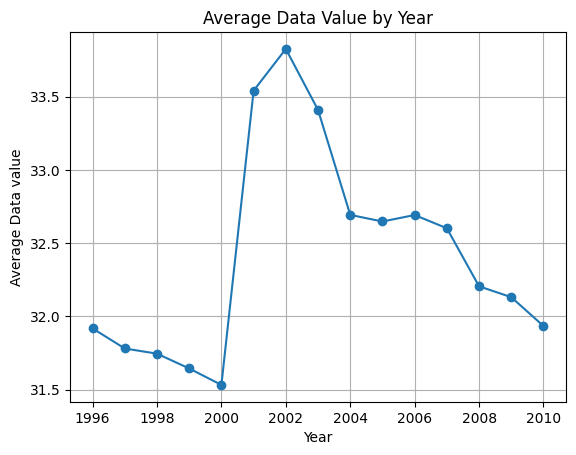

In [ ]:
#Data visualisation
import sqlite3
import matplotlib.pyplot as plt

curr=sqlite3.connect('my_database.db')
cursor=curr.cursor()
cursor.execute("select Year,Avg(Data_Value) As avg_value from my_table Group by Year;")
df_avg = pd.DataFrame(avg_year, columns=['Year', 'avg_value'])

plt.plot(df_avg['Year'],df_avg['avg_value'],marker='o')
plt.title("Average Data Value by Year")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Average Data value")
plt.show()